# Chicago Crime

[data source](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2)

In [34]:
%matplotlib inline

import pandas as pd
import numpy as np

variables

In [35]:
file_path = '/workspaces/test-notebook/data/chicago_crime/Crimes_-_2001_to_present.csv'



Read the data

In [46]:
crimes = pd.read_csv(file_path, parse_dates=[2], index_col=[2])
crimes

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
2015-03-18 23:00:00,10000094,HY190059,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,...,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2015-03-18 22:45:00,10000095,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,10000096,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
2015-03-18 21:00:00,10000097,HY189976,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,...,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"
2015-03-18 22:00:00,10000098,HY190032,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,False,False,223,...,4,39,08B,1183018,1872537,2015,02/10/2018 03:50:01 PM,41.805443,-87.604284,"(41.805443345, -87.604283976)"
2015-03-18 23:00:00,10000099,HY190047,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,733,...,17,68,08B,1170859,1858210,2015,02/10/2018 03:50:01 PM,41.766403,-87.649296,"(41.766402779, -87.649296123)"
2015-03-18 21:35:00,10000100,HY189988,042XX S PRAIRIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,213,...,3,38,08B,1178746,1876914,2015,02/10/2018 03:50:01 PM,41.817553,-87.619819,"(41.817552577, -87.619818523)"
2015-03-18 22:09:00,10000101,HY190020,036XX S WOLCOTT AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,912,...,11,59,18,1164279,1880656,2015,02/10/2018 03:50:01 PM,41.828138,-87.672782,"(41.828138428, -87.672782106)"


In [38]:
crimes.index

DatetimeIndex(['2015-03-18 19:44:00', '2015-03-18 23:00:00',
               '2015-03-18 22:45:00', '2015-03-18 22:30:00',
               '2015-03-18 21:00:00', '2015-03-18 22:00:00',
               '2015-03-18 23:00:00', '2015-03-18 21:35:00',
               '2015-03-18 22:09:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [39]:
print(f'{crimes.memory_usage().sum() / 1024**2} MB')

0.0013904571533203125 MB


/home/codespace/.python/current/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='Date'>

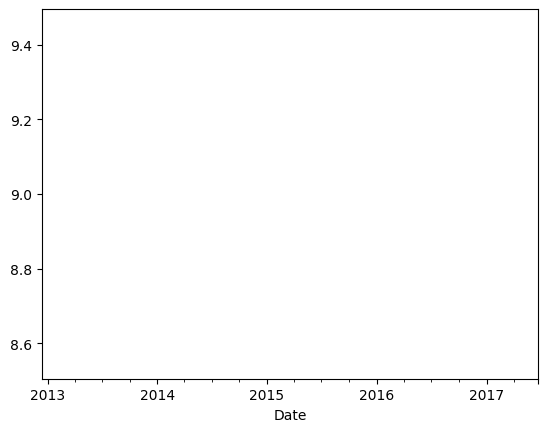

In [45]:
daily_crimes = crimes['Primary Type'].resample('D').count()
daily_crimes.sort_index(inplace=True)
daily_crimes['2015'].plot()